# Рубежный контроль №2

### Бондаренко Иван ИУ5-61Б

## Задание. 
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

- Метод №1: Линейная/логистическая регрессия
- Метод №2: Случайный лес

In [3]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [4]:
#Загрузка датасета
data = pd.read_csv("Admission_Predict.csv")

In [5]:
data.head()

,#,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Предобработка данных 

In [6]:
#Проверка типов данных
data.dtypes

#                     int64
GRE                   int64
TOEFL                 int64
UniversityRating      int64
SOP                 float64
LOR                 float64
CGPA                float64
Research              int64
ChanceOfAdmit       float64
dtype: object

In [7]:
#Размер датасета
data.shape

(400, 9)

In [8]:
#Проверка пустых значений
data.isnull().sum()

#                   0
GRE                 0
TOEFL               0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceOfAdmit       0
dtype: int64

In [9]:
#Удаление строк с пустыми значениями
data = data.dropna(axis=0)
data = data.drop(columns=['#'], axis=1)

In [10]:
data.rename(columns = { 'ChanceOfAdmit': 'COA'}, inplace = True)
data
TARGET_COL_NAME = 'COA'
TARGET_IS_NUMERIC = data[TARGET_COL_NAME].dtype != 'O'
TARGET_IS_NUMERIC

True

<AxesSubplot:>

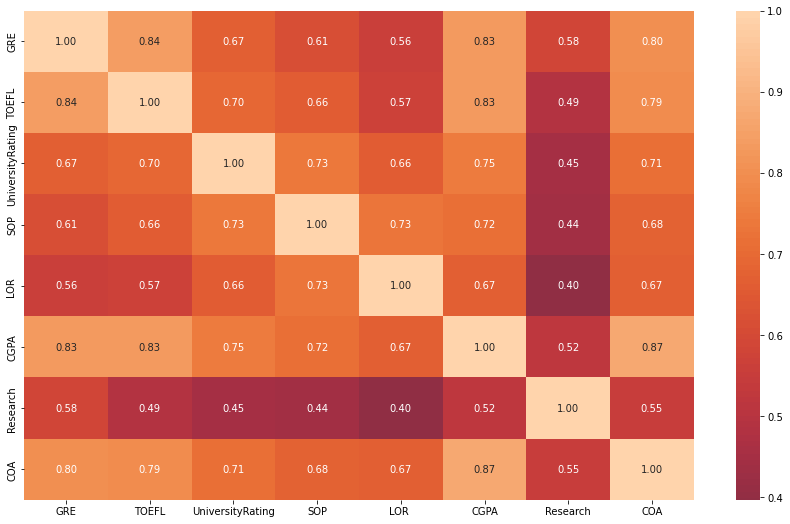

In [11]:
#Построение корреляционной матрицы
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(), ax=ax,annot=True, fmt=".2f", center=0)

В качестве целевого признака возьмём столбец "COA"

In [12]:
data.corr()['COA']

GRE                 0.802610
TOEFL               0.791594
UniversityRating    0.711250
SOP                 0.675732
LOR                 0.669889
CGPA                0.873289
Research            0.553202
COA                 1.000000
Name: COA, dtype: float64

Признаки `GRE Score`, `TOEFL Score`, `CGPA` сильно коррелируют между собой, следовательно, для того, чтобы повысить качество модели, стоит выбрать из них только один, который наиболее сильно коррелирует с целевым признаком, т.е. `CGPA`.

Таким образом, для построения модели использовались бы следующие признаки: `UniversityRating`, `SOP`, `LOR`, `CGPA`, `Research`, `COA`. 

In [13]:
data = data.drop(columns=['GRE', 'TOEFL'], axis=1)

### Масштабирование

In [14]:
scaler = preprocessing.MinMaxScaler()

not_number_cols = data.select_dtypes(include=['object'])
number_cols = data.select_dtypes(exclude=['object'])

number_fields_source = number_cols.loc[:, number_cols.columns!=TARGET_COL_NAME] if TARGET_IS_NUMERIC else number_cols

for col_name in number_fields_source:
    data[col_name] = scaler.fit_transform(data[[col_name]])

data


,UniversityRating,SOP,LOR,CGPA,Research,COA
0,0.75,0.875,0.875,0.913462,1.0,0.92
1,0.75,0.750,0.875,0.663462,1.0,0.76
2,0.50,0.500,0.625,0.384615,1.0,0.72
3,0.50,0.625,0.375,0.599359,1.0,0.80
4,0.25,0.250,0.500,0.451923,0.0,0.65
...,...,...,...,...,...,...
395,0.50,0.625,0.625,0.717949,1.0,0.82
396,0.50,0.500,0.625,0.740385,1.0,0.84
397,0.75,1.000,0.875,0.849359,1.0,0.91
398,0.50,0.625,0.750,0.634615,0.0,0.67


In [15]:
#Разделение выборки на обучающую и тестовую
target = "COA"
xArray = data.drop(target, axis=1)
yArray = data[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

### Линейная регрессия

In [16]:
LR = LinearRegression()
LR.fit(trainX, trainY)

LinearRegression()

Для оценки качества будем использовать:
- коэффициента детерминации, чтобы узнать насколько модель близка к высококачественной
- корень из средней квадратичной ошибки, чтобы выделить большие ошибки в предсказании модели

In [17]:
R2_LR = r2_score(testY, LR.predict(testX))
RMSE_LR = mean_squared_error(testY, LR.predict(testX), squared=True)

In [18]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_LR))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_LR))

Оценка качества модели с помощью коэффициента детерминации: 0.79323683002294
Корень из средней квадратичной ошибки: 0.00478190229094633


С помощью используемых метрик, можем сделать вывод, что качество модели низкое в связи с низкой корреляцией целевого признака с другими параметрами

### Случайный лес

In [19]:
RT = RandomForestRegressor(n_estimators=15, random_state=123)
RT.fit(trainX, trainY)

RandomForestRegressor(n_estimators=15, random_state=123)

In [20]:
R2_RT = r2_score(testY, RT.predict(testX))

In [21]:
RMSE_RT= mean_squared_error(testY, RT.predict(testX), squared=True)

In [22]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_RT))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_RT))

Оценка качества модели с помощью коэффициента детерминации: 0.7476013789537499
Корень из средней квадратичной ошибки: 0.005837333333333334


В данном случае, можем увидеть, что модель линейной регрессии в случае отсутствия сильной корреляции между признаками имеет более высокое качество в задаче регрессии, чем ансамблевый случайный лес. Качество моделей тем не менее низкое и для улучшения можно попробовать перебрать параметр для случайного леса, либо выбрать другой набор входных признаков.